In [1]:
import numpy as np

In [2]:
!cat 2D_example.csv

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602


In [3]:
data = np.loadtxt('2D_example.csv', delimiter = ',')

In [4]:
data

array([[ 1.      , -7.428476,  1.509903],
       [ 0.      ,  2.980693,  1.960821],
       [ 0.      ,  3.988255,  4.636389],
       [ 1.      , -5.789437, -4.621614],
       [ 1.      , -4.894447, -3.26973 ],
       [ 1.      , -1.933949, -0.047276],
       [ 0.      , -1.611771,  5.932201],
       [ 1.      , -6.670152, -1.036282],
       [ 1.      , -2.931415, -0.104475],
       [ 0.      , -0.074762,  1.070002],
       [ 1.      , -2.691793,  4.168774],
       [ 0.      ,  0.461182,  3.453438],
       [ 0.      , -1.354135,  3.751657],
       [ 1.      , -6.229476, -1.209434],
       [ 0.      ,  2.778594,  7.582103],
       [ 1.      , -5.719578, -0.243509],
       [ 0.      ,  0.928322,  3.20852 ],
       [ 0.      ,  0.850475,  2.908955],
       [ 1.      , -6.029489, -1.831199],
       [ 0.      ,  1.116025,  3.353602]])

In [5]:
y = data[:, 0].astype(int)

In [6]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [15]:
X = data[:, 1:3]

In [11]:
x

array([[-7.428476,  1.509903],
       [ 2.980693,  1.960821],
       [ 3.988255,  4.636389],
       [-5.789437, -4.621614],
       [-4.894447, -3.26973 ],
       [-1.933949, -0.047276],
       [-1.611771,  5.932201],
       [-6.670152, -1.036282],
       [-2.931415, -0.104475],
       [-0.074762,  1.070002],
       [-2.691793,  4.168774],
       [ 0.461182,  3.453438],
       [-1.354135,  3.751657],
       [-6.229476, -1.209434],
       [ 2.778594,  7.582103],
       [-5.719578, -0.243509],
       [ 0.928322,  3.20852 ],
       [ 0.850475,  2.908955],
       [-6.029489, -1.831199],
       [ 1.116025,  3.353602]])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
plt.set_cmap(plt.cm.Paired)

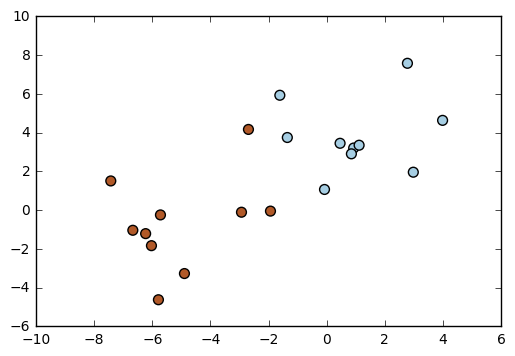

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [17]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [20]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

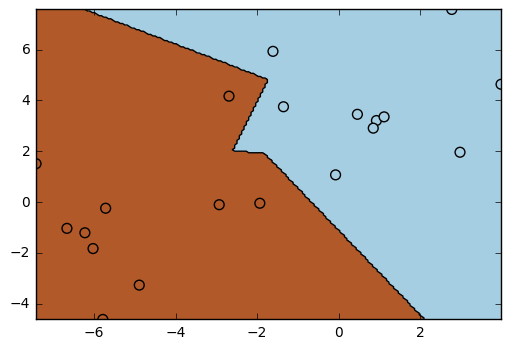

In [22]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
plotBoundary(X, clf)

In [24]:
test = np.array([[0,1,2,3],[0,1,2,3]])

In [27]:
test.ravel()

array([0, 1, 2, 3, 0, 1, 2, 3])

In [28]:
from sklearn import linear_model

clf = linear_model.LogisticRegression()

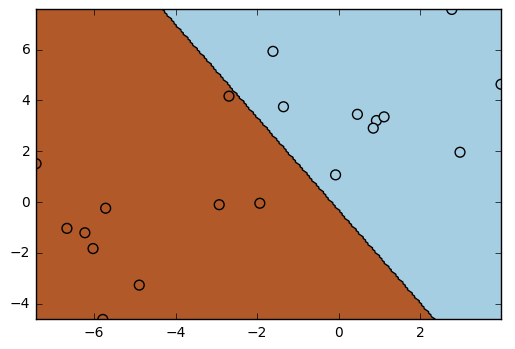

In [32]:
clf.fit(X, y)

plt.scatter(X[:,0], X[:,1], c=y, s=50)
plotBoundary(X, clf)

In [52]:
from sklearn import svm

clf1 = svm.SVC(C =1,kernel='rbf')
clf2 = svm.SVC(C =2,kernel='rbf')
clf3 = svm.SVC(C =3,kernel='rbf')

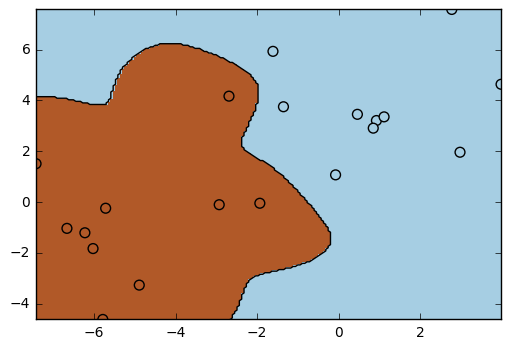

In [55]:
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)

plt.scatter(X[:,0], X[:,1], c=y, s=50)
plotBoundary(X, clf3)

In [50]:
plotBoundary(X, clf2)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.